# Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import random
import os
import sys

# import keras
import keras
from keras import backend as K
backend_keras = keras.backend.backend()
print("keras is using", backend_keras, "as the backend")
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model, Sequential

# for training
# https://keras.io/optimizers/ - list of optimizers, keras documentation
from keras.optimizers import SGD, Nadam, Adamax, Adam, Adadelta, Adagrad, RMSprop, SGD


Using TensorFlow backend.


keras is using tensorflow as the backend


# Load preprocessed data
These are the ones which have been created with the keras notebook

In [2]:
#os.listdir()

In [3]:
x_train_raw = np.load("redshift0750_data_train.npy")
x_test_raw = np.load("redshift0750_data_test.npy")
y_train_val = np.load("redshift0750_labels_train.npy")
y_test = np.load("redshift0750_labels_test.npy")

print(x_train_raw.shape)
print(x_test_raw.shape)
print(y_train_val.shape)
print(y_test.shape)

(2160, 200, 200, 1)
(240, 200, 200, 1)
(2160, 12)
(240, 12)


### train val split

In [4]:
ratio = 0.85
cut = int(len(x_train_raw)*ratio)
x_train = x_train_raw[:cut]
x_val = x_train_raw[cut:]
y_train = y_train_val[:cut]
y_val = y_train_val[cut:]

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1836, 200, 200, 1)
(324, 200, 200, 1)
(1836, 12)
(324, 12)


# Define the CNN architecture

Remember this one is a 12 class problem
Resourses used:
- Guid for implementing keras CNN https://towardsdatascience.com/image-recognition-with-keras-convolutional-neural-networks-e2af10a10114
- Guid to Sequential Model : https://keras.io/getting-started/sequential-model-guide/
- how padding works https://stackoverflow.com/questions/45013060/how-to-do-zero-padding-in-keras-conv-layer#45013181

Note : at the bottom of this cell the activation was 'sigmoid', I changed it to 'softmax' in the hope that this would allow me to plot the accuracy of the classifier. Also I think with softmax it will give me a definite answer...

In [5]:
classifier = Sequential()

# padding = 'valid' means that i reduce dimentionality a little

# extract features
classifier.add(Conv2D(32, (3,3), input_shape=(200,200,1),
                      activation='relu', padding='valid'))
# reduce dimensionality, keep most important info
classifier.add(MaxPooling2D(pool_size=(2,2)))

# add a second layer, again with no padding
classifier.add(Conv2D(16, (3,3), activation='relu', padding='valid'))

# pool again
classifier.add(MaxPooling2D(pool_size=(2,2)))

# add a third layer, again with no padding, I want to reduce dimentions as much as possible
classifier.add(Conv2D(8, (3,3), activation='relu', padding='valid'))

# pool again
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Here I flatten and then guess the class
classifier.add(Flatten())

# fully connected layers: ensures connections to all activations in prev layer

classifier.add(Dense(units=12, activation='softmax'))

# Alternative Architecutres

# Choose optimizer and compile netowrk
sparse_categorical

In [6]:
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, amsgrad=True)
classifier.compile(optimizer=opt, 
                   loss='categorical_crossentropy',
                   metrics=["accuracy"])
print("printing summary of model")
classifier.summary()

printing summary of model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)         

# Train the network

In [7]:
EPOCHS = 150

H = classifier.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_val, y_val))

Train on 1836 samples, validate on 324 samples
Epoch 1/150
1836/1836 [==============================] - 50s 27ms/step - loss: 2.4521 - accuracy: 0.1334 - val_loss: 2.2564 - val_accuracy: 0.1790
Epoch 2/150
1836/1836 [==============================] - 59s 32ms/step - loss: 1.9655 - accuracy: 0.2821 - val_loss: 1.6734 - val_accuracy: 0.3457
Epoch 3/150
1836/1836 [==============================] - 56s 30ms/step - loss: 1.5163 - accuracy: 0.4085 - val_loss: 1.6291 - val_accuracy: 0.2840
Epoch 4/150
1836/1836 [==============================] - 54s 29ms/step - loss: 1.3980 - accuracy: 0.4047 - val_loss: 1.3803 - val_accuracy: 0.4290
Epoch 5/150
1836/1836 [==============================] - 55s 30ms/step - loss: 1.2539 - accuracy: 0.4902 - val_loss: 1.3535 - val_accuracy: 0.4414
Epoch 6/150
1836/1836 [==============================] - 55s 30ms/step - loss: 1.1651 - accuracy: 0.5354 - val_loss: 1.3718 - val_accuracy: 0.4383
Epoch 7/150
1836/1836 [==============================] - 53s 29ms/step 

1836/1836 [==============================] - 57s 31ms/step - loss: 0.3336 - accuracy: 0.8660 - val_loss: 0.9413 - val_accuracy: 0.5802
Epoch 57/150
1836/1836 [==============================] - 57s 31ms/step - loss: 0.3040 - accuracy: 0.8802 - val_loss: 1.0169 - val_accuracy: 0.5833
Epoch 58/150
1836/1836 [==============================] - 55s 30ms/step - loss: 0.3378 - accuracy: 0.8606 - val_loss: 1.1607 - val_accuracy: 0.5340
Epoch 59/150
1836/1836 [==============================] - 54s 30ms/step - loss: 0.3790 - accuracy: 0.8393 - val_loss: 1.1148 - val_accuracy: 0.5772
Epoch 60/150
1836/1836 [==============================] - 56s 31ms/step - loss: 0.3654 - accuracy: 0.8399 - val_loss: 1.0504 - val_accuracy: 0.5494
Epoch 61/150
1836/1836 [==============================] - 64s 35ms/step - loss: 0.5254 - accuracy: 0.7876 - val_loss: 1.9197 - val_accuracy: 0.5062
Epoch 62/150
1836/1836 [==============================] - 57s 31ms/step - loss: 0.6912 - accuracy: 0.7200 - val_loss: 1.1332 

1836/1836 [==============================] - 52s 29ms/step - loss: 0.3853 - accuracy: 0.8497 - val_loss: 1.4805 - val_accuracy: 0.5340
Epoch 112/150
1836/1836 [==============================] - 52s 28ms/step - loss: 0.3769 - accuracy: 0.8491 - val_loss: 1.3854 - val_accuracy: 0.5833
Epoch 113/150
1836/1836 [==============================] - 52s 29ms/step - loss: 0.2413 - accuracy: 0.9025 - val_loss: 1.2780 - val_accuracy: 0.5432
Epoch 114/150
1836/1836 [==============================] - 53s 29ms/step - loss: 0.1480 - accuracy: 0.9542 - val_loss: 1.2038 - val_accuracy: 0.5926
Epoch 115/150
1836/1836 [==============================] - 53s 29ms/step - loss: 0.1127 - accuracy: 0.9733 - val_loss: 1.1365 - val_accuracy: 0.5833
Epoch 116/150
1836/1836 [==============================] - 52s 28ms/step - loss: 0.0893 - accuracy: 0.9853 - val_loss: 1.1814 - val_accuracy: 0.5710
Epoch 117/150
1836/1836 [==============================] - 53s 29ms/step - loss: 0.0842 - accuracy: 0.9815 - val_loss: 1

# Evaluate netowrk : stats and plots

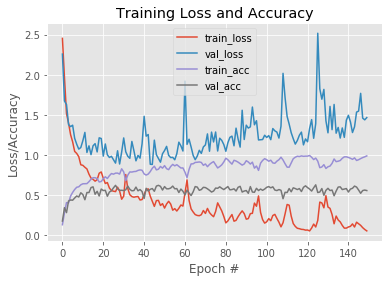

In [8]:
# plot the training loss and accuracy for each epoch
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance_no_encoder_50_architecture_01.png")
plt.show()

In [9]:
print(H.history.keys())
#print(H.history["accuracy"])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# OR load trained CNN

In [ ]:
print(x_test_raw.shape)
print(y_test.shape)

# Make prediction